# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:10<00:00, 1542.37it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 34806.81it/s]


## 1.5 Preparing data for models

In [19]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [20]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Music_Arts', 'Literacy_Language', 'AppliedLearning', 'Care_Hunger', 'SpecialNeeds', 'Warmth', 'History_Civics', 'Math_Science', 'Health_Sports']
Shape of matrix after one hot encodig  (109248, 9)


In [21]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'Health_Wellness', 'Civics_Government', 'Literature_Writing', 'SpecialNeeds', 'VisualArts', 'NutritionEducation', 'Warmth', 'College_CareerPrep', 'EarlyDevelopment', 'History_Geography', 'Health_LifeScience', 'Literacy', 'EnvironmentalScience', 'FinancialLiteracy', 'Music', 'PerformingArts', 'AppliedSciences', 'Gym_Fitness', 'CharacterEducation', 'SocialSciences', 'Extracurricular', 'ESL', 'ParentInvolvement', 'Care_Hunger', 'ForeignLanguages', 'Other', 'CommunityService', 'TeamSports', 'Mathematics']
Shape of matrix after one hot encodig  (109248, 30)


In [22]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [23]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3953.36it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:22<00:00, 539.44it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [23]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [24]:
project_data['clean_essay']=preprocessed_essays
project_data['clean_title']=preprocessed_titles

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'clean_essay', 'clean_title'],
      dtype='object')

In [26]:
project_data.drop(['Unnamed: 0', 'project_submitted_datetime','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','essay','project_title','id'], axis=1)


teacher_id teacher_prefix school_state  \
0       c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1       897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2       3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3       f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   
4       be1f7507a41f8479dc06f047086a39ec           Mrs.           TX   
5       a50a390e8327a95b77b9e495b58b9a6e           Mrs.           FL   
6       9b40170bfa65e399981717ee8731efc3           Mrs.           CT   
7       5bfd3d12fae3d2fe88684bbac570c9d2            Ms.           GA   
8       487448f5226005d08d36bdd75f095b31           Mrs.           SC   
9       140eeac1885c820ad5592a409a3a8994            Ms.           NC   
10      363788b51d40d978fe276bcb1f8a2b35           Mrs.           CA   
11      4ba7c721133ef651ca54a03551746708            Ms.           CA   
12      5e52c92b7e3c472aad247a239d345543           Mrs.           NY   
13      178f6ae765cd4e0fb143a77c47fd65e2           Mrs.           OK   
14      424819801de22a60bba7d0f4354d0258            Ms.           MA   
15      bb6d6d054824fa01576ab38dfa2be160            Ms.           TX   
16      4ad7e280fddff889e1355cc9f29c3b89           Mrs.           FL   
17      e39abda057354c979c5b075cffbe5f88            Ms.           NV   
18      fcd9b003fc1891383f340a89da02a1a6           Mrs.           GA   
19      8e07a98deb1bc74c75b97521e05b1691            Ms.           OH   
20      e0c1aad1f71badeff703fadc15f57680           Mrs.           PA   
21      2d4a4d2d774e5c2fdd25b2ba0e7341f8           Mrs.           NC   
22      30f08fbe02eba5453c4ce2e857e88eb4            Ms.           CA   
23      258ef2e6ab5ce007ac6764ce15d261ba            Mr.           AL   
24      74f8690562c44fc88f65f845b9fe61d0           Mrs.           FL   
25      b8bf3507cee960d5fedcb27719df2d59           Mrs.           AL   
26      7a0a5de5ed94e7036946b1ac3eaa99d0            Ms.           TX   
27      efdc3cf14d136473c9f62becc00d4cec        Teacher           LA   
28      22c8184c4660f1c589bea061d14b7f35           Mrs.           GA   
29      45f16a103f1e00b7439861d4e0728a59           Mrs.           VA   
...                                  ...            ...          ...   
109218  91f5c69bf72c82edb9bc1f55596d8d95           Mrs.           IL   
109219  9a6784108c76576565f46446594f99c4        Teacher           FL   
109220  19c622a38a0cd76c2e9dbcc40541fabd           Mrs.           WI   
109221  031e299278ac511616b2950fc1312a55        Teacher           NY   
109222  6f6e951e435aa9dc966091945414bcc4            Ms.           NC   
109223  6db62616b4ef6efc2310088f7ea0ae14            Ms.           GA   
109224  651866d8215616f65934aafcbee21bf5            Ms.           NY   
109225  c628dff071aa8028b08a5d4972bef2a1           Mrs.           NC   
109226  1d286ff10ee3982b2b47813f1e415ef2            Ms.           CA   
109227  e15cd063caa1ce11a45f2179535105f2           Mrs.           NY   
109228  d0603199630760d8d0eb003108208998           Mrs.           LA   
109229  523f95270c6aec82bee90e3931ceeeca           Mrs.           CO   
109230  ee59900af64d9244487e7ed87d0bc423            Ms.           NY   
109231  9d7a4dae637d1a170778e2db1515e574           Mrs.           AZ   
109232  c116af7435274872bea9ff123a69cf6a           Mrs.           MD   
109233  b90258ab009b84e0dc11a7186d597141            Ms.           AZ   
109234  dd68d9fbae85933c0173c13f66291cbe            Ms.           NY   
109235  9636fcacbf65eb393133a94c83c4a0d4           Mrs.           TX   
109236  2950019dd34581dbcddcae683e74207a           Mrs.           OH   
109237  07fd2c09f8dfcc74dbb161e1ec3df1fe           Mrs.           IN   
109238  5b42211690ca8418c7c839436d0b7e49           Mrs.           WI   
109239  8b9a9dc5bd4aa0301b0ff416e2ed29f6           Mrs.           MN   
109240  58c112dcb2f1634a4d4236bf0dcdcb31           Mrs.           MD   
109241  3e5c98480f4f39d465837b2955df6ae0           Mrs.           MD  

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [27]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


In [28]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [28]:
X=project_data['clean_essay'].values

In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = X
'''a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'''
NEG=[]
NEU=[]
POS=[]
COMP=[]
s={} 
h=[]
for i in for_sentiment:
       
    ss = sid.polarity_scores(i)
    
    for k in ss:
        s={k:ss[k]}
        
        h.append(s)

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

In [30]:
g=pd.DataFrame(h)
print(g.head(5))

   compound    neg    neu    pos
0    0.9694    NaN    NaN    NaN
1       NaN    NaN  0.844    NaN
2       NaN    NaN    NaN  0.144
3       NaN  0.012    NaN    NaN
4    0.9856    NaN    NaN    NaN


In [31]:
compound=list(g['compound'].dropna())
#print(compound)
pos=list(g['pos'].dropna())
#print(pos)
neu=list(g['neu'].dropna())
#print(neu)
neg=list(g['neg'].dropna())
#print(neg)

In [32]:
q={'pos':pos,'neg':neg,'compound':compound,'neu':neu}

In [33]:
q=pd.DataFrame(q)
print(q.head(10))

   compound    neg    neu    pos
0    0.9694  0.012  0.844  0.144
1    0.9856  0.048  0.669  0.283
2    0.9816  0.122  0.659  0.219
3    0.9656  0.106  0.649  0.246
4    0.8524  0.066  0.791  0.143
5    0.9776  0.111  0.647  0.242
6    0.9743  0.079  0.680  0.241
7    0.9891  0.011  0.768  0.222
8    0.9975  0.009  0.630  0.361
9    0.9893  0.105  0.559  0.336


In [34]:
project_data['compound']=compound
project_data['neg']=neg
project_data['pos']=pos
project_data['neu']=neu

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'clean_essay', 'clean_title'],
      dtype='object')

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [31]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    # d. Y-axis label
X=project_data
Y=X['project_is_approved']     

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [33]:
print("="*100)

print("train=>",X_train.shape, y_train.shape)

print("test=>",X_test.shape, y_test.shape)

print("="*100)

train=> (73196, 22) (73196,)
test=> (36052, 22) (36052,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

##### numerical

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

'''encode numerical feature price'''
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1)) # use code from sample

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)

print("="*100)    
    

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [35]:
'''encode numerical feature teacher_number_of_previously_posted_projects'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
 
X_train_posted_norm= normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_posted_norm.shape, y_train.shape)

print(X_test_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [37]:
'''encode numerical feature compound from sentimental'''



'encode numerical feature compound from sentimental'

In [42]:
'''encode numerical feature pos from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['pos'].values.reshape(-1,1))
 
X_train_pos_norm= normalizer.transform(X_train['pos'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)

print(X_test_pos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [43]:
'''encode numerical feature neg from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))
 
X_train_neg_norm= normalizer.transform(X_train['neg'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [44]:
'''encode numerical feature neu from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))
 
X_train_neu_norm= normalizer.transform(X_train['neu'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [45]:
'''encode numerical feature quantity from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))
 
X_train_quantity_norm= normalizer.transform(X_train['quantity'].values.reshape(-1,1))

X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)

print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [46]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
'''count no of words in titles'''
title_word_count_train = X_train['clean_title'].str.split().apply(len)
title_word_count_train = title_word_count_train.values



title_word_count_test = X_test['clean_title'].str.split().apply(len)
title_word_count_test =title_word_count_test.values

In [47]:
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(title_word_count_train.reshape(-1,1))
 
X_train_title_norm= normalizer.transform(title_word_count_train.reshape(-1,1))

X_test_title_norm = normalizer.transform(title_word_count_test.reshape(-1,1))

print("After vectorizations")
print(X_train_title_norm.shape, y_train.shape)

print(X_test_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [48]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
'''count no of words in essays'''
essay_word_count_train = X_train['clean_essay'].str.split().apply(len)
essay_word_count_train = essay_word_count_train.values



essay_word_count_test = X_test['clean_essay'].str.split().apply(len)
essay_word_count_test =essay_word_count_test.values

In [49]:
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(essay_word_count_train.reshape(-1,1))
 
X_train_essay_norm= normalizer.transform(essay_word_count_train.reshape(-1,1))

X_test_essay_norm = normalizer.transform(essay_word_count_test.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_norm.shape, y_train.shape)

print(X_test_essay_norm.shape, y_test.shape)
print("="*100)
print(type(X_test_essay_norm))

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
<class 'numpy.ndarray'>


##### categorical features

In [38]:
'''encoding project grade'''
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split(","))
    
grade_dict = dict(my_counter)
grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))    
vectorizer_1 = CountVectorizer(vocabulary=list(grade_dict.keys()), lowercase=False, binary=True)
vectorizer_1.fit(X_train['project_grade_category'].values) # fit has to happen only on train data



# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_1.transform(X_train['project_grade_category'].values.astype('U'))
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
X_test_grade_ohe = vectorizer_1.transform(X_test['project_grade_category'].values.astype('U'))

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)

print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_1.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['Grades 3-5', 'Grades PreK-2', 'Grades 6-8', 'Grades 9-12']


In [39]:
'''teacher_prefix
'''

for i in project_data['teacher_prefix'].values:

    if i=='nan':
        i='nan'


In [40]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(" ")# to handle nan values by replacing them with empty strings

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
    
prefix = dict(my_counter)
prefix = dict(sorted(prefix.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(prefix.keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

['Dr.', 'Teacher', 'Ms.', 'Mr.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 5)


In [41]:
X_train['teacher_prefix'] = X_train['teacher_prefix'].fillna("")
X_test['teacher_prefix'] = X_test['teacher_prefix'].fillna("")

In [42]:
'''encode categorical feature teacher_prefix'''
'''encode categorical feature teacher_prefix'''
vectorizer_2 = CountVectorizer(vocabulary=list(prefix.keys()), lowercase=False, binary=True)
vectorizer_2.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_2.transform(X_train['teacher_prefix'].values.astype('U'))
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
X_test_teacher_ohe = vectorizer_2.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)

print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_2.get_feature_names()[1])
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
Teacher


In [43]:
'''encode categorical feature school_state'''


from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split(" "))

state_dict = dict(my_counter)
state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))      
    
vectorizer_3 = CountVectorizer(vocabulary=list(state_dict.keys()), lowercase=False, binary=True)
vectorizer_3.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_3.transform(X_train['school_state'].values)

X_test_state_ohe = vectorizer_3.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)

print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_3.get_feature_names()[2])
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
IL


In [44]:
'''clean categories'''
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_4 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_4.fit(X_train['clean_categories'].values)
#print(vectorizer.get_feature_names())
 # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cate_ohe = vectorizer_4.transform(X_train['clean_categories'].values)

X_test_clean_cate_ohe = vectorizer_4.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cate_ohe.shape, y_train.shape)

print(X_test_clean_cate_ohe.shape, y_test.shape)
print(vectorizer_4.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['Music_Arts', 'Literacy_Language', 'AppliedLearning', 'Care_Hunger', 'SpecialNeeds', 'Warmth', 'History_Civics', 'Math_Science', 'Health_Sports']


In [45]:
'''clean sub categories'''
vectorizer_5 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_5.fit(X_train['clean_subcategories'].values)
# we use the fitted CountVectorizer to convert the text to vector



X_train_subclean_cate_ohe = vectorizer_5.transform(X_train['clean_subcategories'].values)

X_test_subclean_cate_ohe = vectorizer_5.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subclean_cate_ohe.shape, y_train.shape)

print(X_test_subclean_cate_ohe.shape, y_test.shape)
print(vectorizer_5.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['Economics', 'Health_Wellness', 'Civics_Government', 'Literature_Writing', 'SpecialNeeds', 'VisualArts', 'NutritionEducation', 'Warmth', 'College_CareerPrep', 'EarlyDevelopment', 'History_Geography', 'Health_LifeScience', 'Literacy', 'EnvironmentalScience', 'FinancialLiteracy', 'Music', 'PerformingArts', 'AppliedSciences', 'Gym_Fitness', 'CharacterEducation', 'SocialSciences', 'Extracurricular', 'ESL', 'ParentInvolvement', 'Care_Hunger', 'ForeignLanguages', 'Other', 'CommunityService', 'TeamSports', 'Mathematics']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

###### bow

In [45]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
'''encoding essays in bow'''
#code is taken from this notebook

vectorizer_6 = CountVectorizer(min_df=10)
vectorizer_6.fit(X_train['clean_essay'].values)# fit is for train 

X_train_essay_bow = vectorizer_6.transform(X_train['clean_essay'].values)# for train

X_test_essay_bow = vectorizer_6.transform(X_test['clean_essay'].values)#for test

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)

print(X_test_essay_bow.shape, y_test.shape)
print("="*100)    

After vectorizations
(73196, 14271) (73196,)
(36052, 14271) (36052,)


In [46]:
'''encode titles bow'''
vectorizer_7 = CountVectorizer(min_df=10)
vectorizer_7.fit(X_train['clean_title'].values)# fit for train

# transform for all
X_train_titles_bow = vectorizer_7.transform(X_train['clean_title'].values)

X_test_titles_bow = vectorizer_7.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)

print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 2652) (73196,)
(36052, 2652) (36052,)


##### tfidf

In [46]:
# Please write all the code with proper documentation
'''tfidf_titles'''
vectorizer_8 = TfidfVectorizer(min_df=10)
vectorizer_8.fit(X_train['clean_title'].values)# fit for train

# transform for all
X_train_titles_tfidf= vectorizer_8.transform(X_train['clean_title'].values)

X_test_titles_tfidf = vectorizer_8.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)

print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(73196, 2633) (73196,)
(36052, 2633) (36052,)


In [47]:
'''tfidf_essay'''
vectorizer_9 = TfidfVectorizer(min_df=10)
vectorizer_9.fit(X_train['clean_essay'].values)# fit for train

# transform for all
X_train_essay_tfidf= vectorizer_9.transform(X_train['clean_essay'].values)

X_test_essay_tfidf = vectorizer_9.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 14312) (73196,)
(36052, 14312) (36052,)


##### average word to vector

In [49]:
'''average word to vector train essay '''
avg_w2v_vectors_trainessay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_trainessay.append(vector)

print(len(avg_w2v_vectors_trainessay))
print(len(avg_w2v_vectors_trainessay[0]))

100%|██████████| 73196/73196 [00:24<00:00, 2973.71it/s]

73196
300


In [50]:
'''average word to vector train title'''
avg_w2v_vectors_traintitle = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_traintitle.append(vector)

print(len(avg_w2v_vectors_traintitle))
print(len(avg_w2v_vectors_traintitle[0]))

100%|██████████| 73196/73196 [00:01<00:00, 46491.15it/s]

73196
300


In [51]:
'''average word to vector test essay'''
avg_w2v_vectors_testessay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_testessay.append(vector)

print(len(avg_w2v_vectors_testessay))
print(len(avg_w2v_vectors_testessay[0]))

100%|██████████| 36052/36052 [00:12<00:00, 2929.14it/s]

36052
300


In [52]:
'''average word to vector test titles'''
avg_w2v_vectors_testtitle = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_testtitle.append(vector)

print(len(avg_w2v_vectors_testtitle))
print(len(avg_w2v_vectors_testtitle[0]))

100%|██████████| 36052/36052 [00:00<00:00, 38702.73it/s]

36052
300


##### tfidf word to vector

In [53]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
'''titles'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [54]:
# compute average word2vec for each review.
'''train titles'''
tfidf_w2v_vectors_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_tr.append(vector)

print(len(tfidf_w2v_vectors_title_tr))
print(len(tfidf_w2v_vectors_title_tr[0]))

100%|██████████| 73196/73196 [00:03<00:00, 21693.74it/s]

73196
300


In [55]:
'''test titles'''
tfidf_w2v_vectors_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_te.append(vector)

100%|██████████| 36052/36052 [00:01<00:00, 24000.92it/s]


In [56]:
'''essay'''
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [57]:
# average Word2Vec
'''train essay'''
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_tr.append(vector)

print(len(tfidf_w2v_vectors_essay_tr))
print(len(tfidf_w2v_vectors_essay_tr[0]))

100%|██████████| 73196/73196 [02:24<00:00, 508.16it/s]

73196
300


In [58]:
# average Word2Vec
'''test essay'''
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_te.append(vector)

print(len(tfidf_w2v_vectors_essay_te))
print(len(tfidf_w2v_vectors_essay_te[0]))

100%|██████████| 36052/36052 [01:10<00:00, 512.55it/s]

36052
300


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [59]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [60]:
# Please write all the code with proper documentation
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#merge all features
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_titles_tfidf,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm))

X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_titles_tfidf,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm))

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (73196, 17024) (73196,)
test matrix=> (36052, 17024) (36052,)


In [52]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
def gd(X_tr,X_te):
    
    depth = [1, 5,10,13,15,17,20]
    sample_split = [5, 10, 100, 500]

    tuned_parameters = {'max_depth': depth,'min_samples_split':sample_split}
    
    dc= DecisionTreeClassifier(class_weight='balanced')

    clf_1 = GridSearchCV(dc, tuned_parameters, cv=3, scoring='roc_auc',verbose=1,n_jobs = -1)
    clf_1.fit(X_tr, y_train)

    train_auc= clf_1.cv_results_['mean_train_score']

    cv_auc = clf_1.cv_results_['mean_test_score'] 





    # test AUC
    print("L1+++++++++++++++")
    print(clf_1.score(X_te, y_test))
    print(clf_1.best_estimator_)# to know best parameters
    depth_opt, split_opt = clf_1.best_params_.get('max_depth'), clf_1.best_params_.get('min_samples_split')
    print(depth_opt)
    print(split_opt)
  #how to draw heatmap 
  #https://seaborn.pydata.org/generated/seaborn.heatmap.html
    #https://github.com/omkar1610/Amazon-Fine-Food-Reviews/blob/master/08%20Amazon%20Fine%20Food%20Reviews%20Analysis_Decision%20Trees
    
    df_heatmap = pd. DataFrame(train_auc. reshape(7, 4), index=depth, columns=sample_split )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=18)
    plt. xlabel('Sample_Split' , size=18)
    plt. title("Train Data", size=24)
    plt. show()

    df_heatmap = pd. DataFrame(cv_auc. reshape(7, 4), index=depth, columns=sample_split )
    fig = plt. figure(figsize=(5, 3))
    heatmap = sns. heatmap(df_heatmap, annot=True)
    plt. ylabel('Depth' , size=18)
    plt. xlabel('Sample_Split' , size=18)
    plt. title("CV Data", size=24)
    plt. show()

    

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  7.7min finished


L1+++++++++++++++
0.6234644800046839
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
10
500


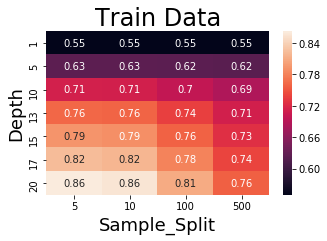

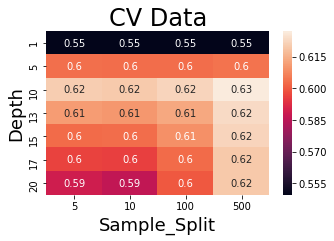

In [63]:
gd(X_tr,X_te)

- AUC BOW=0.6234644800046839
- max_depth=10
- min_sample_split=500

In [64]:
#test phase
# TEST PHASE FOR L1
dc=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dc.fit(X_tr,y_train)
pred = dc.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 69.202818%


In [65]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.23      0.44      0.30      5459
           1       0.88      0.74      0.80     30593

   micro avg       0.69      0.69      0.69     36052
   macro avg       0.55      0.59      0.55     36052
weighted avg       0.78      0.69      0.73     36052



In [66]:
pred_proba_te=dc.predict_proba(X_te)
pred_proba_te  = pred_proba_te[:, 1]

pred_proba_tr=dc.predict_proba(X_tr)
pred_proba_tr  = pred_proba_tr[:, 1]

In [67]:
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds

In [68]:
fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

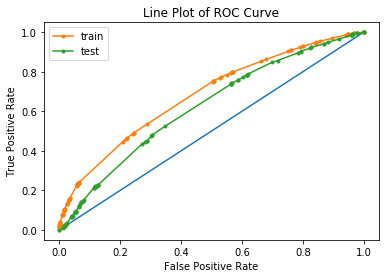

In [69]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [70]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

negatve  positive
negatve      2380      3079
positive     8024     22569

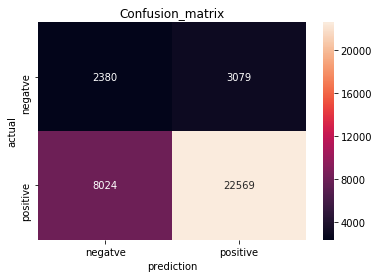

In [71]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2380
- FP=3079
- FN=8024
- TP=22569

In [72]:
pred

array([1, 1, 0, ..., 1, 1, 0])

In [73]:
# creating dataframe for y_test
y_Test=pd.DataFrame(y_test)

In [74]:
y_Test.head()

project_is_approved
106400                    1
42717                     1
55693                     0
78466                     1
36382                     1

In [84]:
# add pred values in that dataframe
y_Test["pred"]=pred    

In [85]:

y_Test.head()

project_is_approved  pred
106400                    1     1
42717                     1     1
55693                     0     0
78466                     1     1
36382                     1     1

In [100]:
# selecting rows which are actually false 
g=y_Test[y_Test['project_is_approved']==0]

In [102]:
# now select rows which are correctly pred from all actual false
h=g[g['pred']==1]


In [110]:
h.head()

project_is_approved  pred
84111                    0     1
74779                    0     1
27622                    0     1
45146                    0     1
56477                    0     1

In [106]:
# getting index of all fp points
k=h.index


In [108]:
index_fp=list(k)

In [151]:
len(index_fp)
       
  

3079

In [113]:

t=""

for i in index_fp:
    '''concat all the features'''
    
    t=t+X.loc[i,"clean_essay"]
    #print( vectorizer_7.get_feature_names()[i])   

In [114]:
# how to plot word cloud 
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen.ipynb
#https://stackoverflow.com/questions/342687/algorithm-to-implement-a-word-cloud-like-wordle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

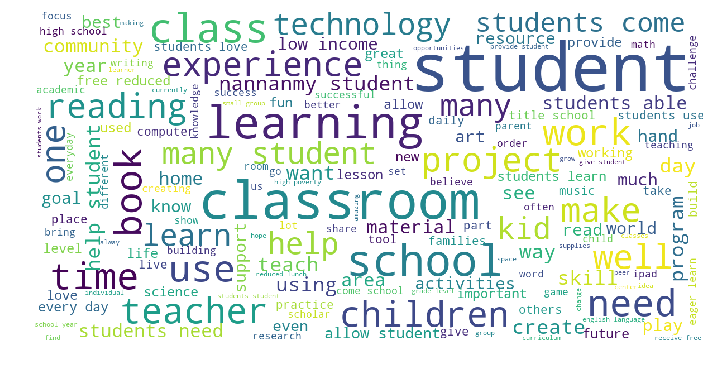

In [115]:
show_wordcloud(t)

In [143]:
X.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'clean_essay', 'clean_title'],
      dtype='object')

In [237]:
price=[]
clas=[]
prev=[]
for i in index_fp:
    clas.append(y_Test.loc[i,'pred'])
    '''concat all the features'''
    price.append(X.loc[i,"price"])
    prev.append(X.loc[i,"teacher_number_of_previously_posted_projects"])
   

In [238]:
cd=pd.DataFrame(columns=['price','prev','clas'])

In [241]:
cd['price']=price
cd['prev']=prev
cd['clas']=clas

In [242]:
cd.head()
        

price  prev  clas
0  185.40     0     1
1  129.99    14     1
2  377.61     2     1
3  208.00     0     1
4  975.78     5     1

In [219]:
y_test.head()

106400    1
42717     1
55693     0
78466     1
36382     1
Name: project_is_approved, dtype: int64

In [209]:
approved_price_proj = cd['price']


No handles with labels found to put in legend.


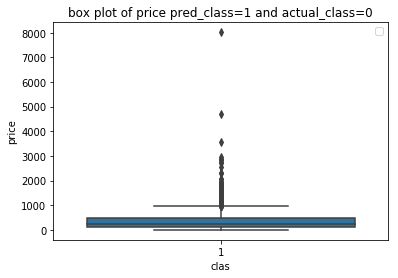

In [259]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
import seaborn as sns

sns.boxplot(x='clas',y='price', data=cd)

    
plt.title("box plot of price pred_class=1 and actual_class=0")
plt.legend()
plt.show()

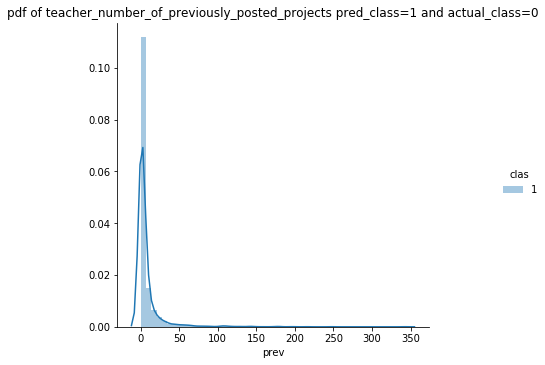

In [260]:
#pdf
sns.FacetGrid(cd, hue="clas", size=5) \
   .map(sns.distplot, "prev") \
   .add_legend();
plt.title("pdf of teacher_number_of_previously_posted_projects pred_class=1 and actual_class=0")
plt.show();

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [124]:
#collecting names of all features
L1=list(vectorizer_1.get_feature_names())
L2=list(vectorizer_2.get_feature_names())
L3=list(vectorizer_3.get_feature_names())
L4=list(vectorizer_4.get_feature_names())
L5=list(vectorizer_5.get_feature_names())
L6=list(vectorizer_6.get_feature_names())
L7=list(vectorizer_7.get_feature_names())


In [140]:
K=list(vectorizer_7.get_feature_names())

In [125]:
A=L1+L2+L3+L4+L5+L6+L7 

In [126]:
A.append("price")

A.append("prev_proposed_projects")

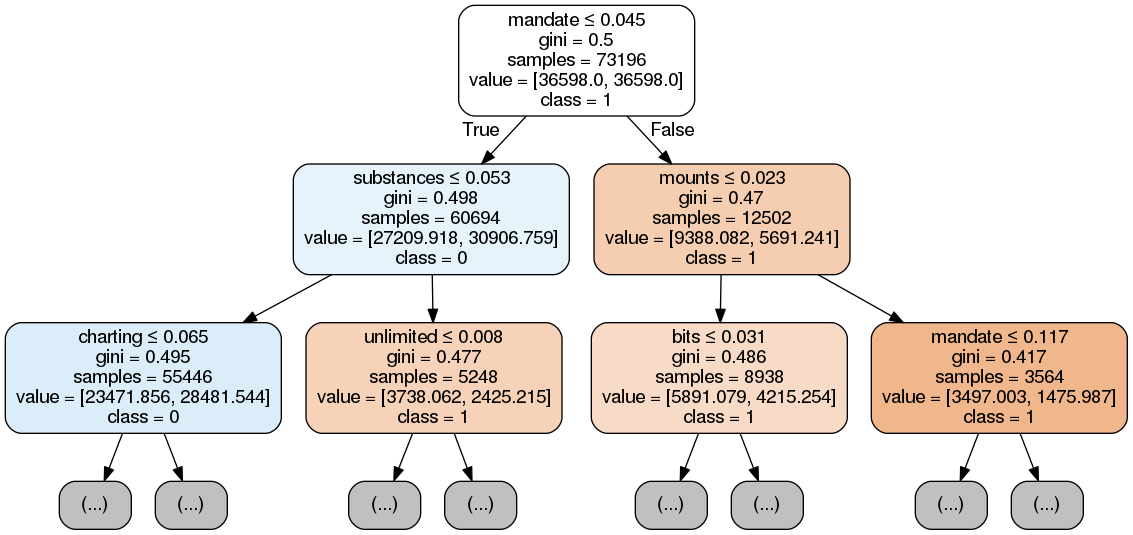

In [142]:
# what is graphiviz and how to plot it
# https://github.com/scikit-learn/scikit-learn/issues/9952
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen
import graphviz
from sklearn import tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

target = ['1','0']
# Create DOT data
data = tree.export_graphviz(dc,out_file=None,class_names=target,filled=True,rounded=True,special_characters=True,max_depth=2,feature_names=A)

# Draw graph
graph = pydotplus.graph_from_dot_data(data)  
#graph = Source(data)

# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))))

In [0]:
# Please write all the code with proper documentation

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [48]:
# Please write all the code with proper documentation
#merging
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_titles_tfidf,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_titles_tfidf,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_titles_tfidf,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)


Final Data matrix
train matrix=> (73196, 17046) (73196,)
test matrix=> (36052, 17046) (36052,)


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  7.7min finished


L1+++++++++++++++
0.6318168510915642
DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=13, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
13
500


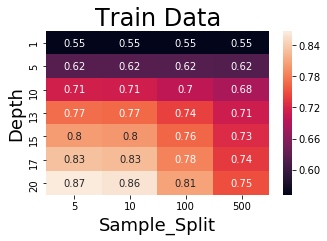

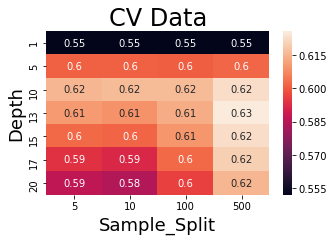

In [53]:
gd(X_tr,X_te)

- AUC tfidf=0.6318168510915642
- max_depth=13
- min_sample_split=500

In [54]:
#test phase
# TEST PHASE FOR L1
dc=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dc.fit(X_tr,y_train)
pred = dc.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 51.425718%


In [55]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.19      0.69      0.30      5459
           1       0.90      0.48      0.63     30593

   micro avg       0.51      0.51      0.51     36052
   macro avg       0.54      0.58      0.46     36052
weighted avg       0.79      0.51      0.58     36052



In [56]:
pred_proba_te=dc.predict_proba(X_te)
pred_proba_te  = pred_proba_te[:, 1]

pred_proba_tr=dc.predict_proba(X_tr)
pred_proba_tr  = pred_proba_tr[:, 1]

In [57]:
#AUC SCORE
auc_score_test_tfidf = roc_auc_score(y_test,pred_proba_te)
print(auc_score_test_tfidf)

0.6289915684886065


In [58]:
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds

In [59]:
fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

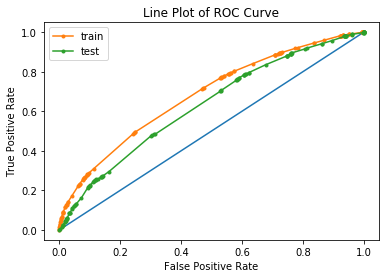

In [60]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [61]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

negatve  positive
negatve      3743      1716
positive    15796     14797

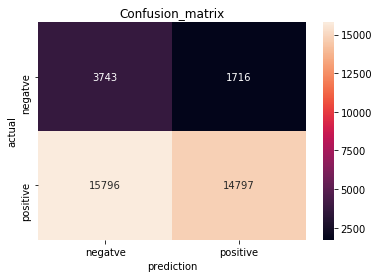

In [62]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=3743
- FP=1716
- FN=15796
- TP=14797

In [63]:
# creating dataframe for y_test
y_Test=pd.DataFrame(y_test)

In [64]:
# add pred values in that dataframe
y_Test["pred"]=pred  

In [65]:
# selecting rows which are actually false 
g=y_Test[y_Test['project_is_approved']==0]

In [66]:
# now select rows which are correctly pred from all actual false
h=g[g['pred']==1]

In [67]:
k=h.index

In [68]:
len(k)

1716

In [69]:
index_fp=list(k)

In [70]:
t=""

for i in index_fp:
    '''concat all the features'''
    
    t=t+X.loc[i,"clean_essay"]

In [71]:
# how to plot word cloud 
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen.ipynb
#https://stackoverflow.com/questions/342687/algorithm-to-implement-a-word-cloud-like-wordle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

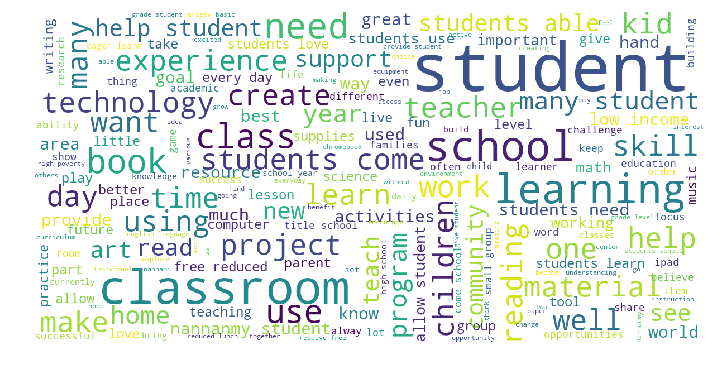

In [72]:
show_wordcloud(t)

In [73]:
price=[]
clas=[]
prev=[]
for i in index_fp:
    clas.append(y_Test.loc[i,'pred'])
    
    price.append(X.loc[i,"price"])
    prev.append(X.loc[i,"teacher_number_of_previously_posted_projects"])

In [74]:
cd=pd.DataFrame(columns=['price','prev','clas'])

In [75]:
cd['price']=price
cd['prev']=prev
cd['clas']=clas

No handles with labels found to put in legend.


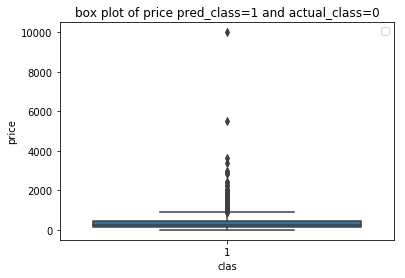

In [76]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
import seaborn as sns

sns.boxplot(x='clas',y='price', data=cd)

    
plt.title("box plot of price pred_class=1 and actual_class=0")
plt.legend()
plt.show()

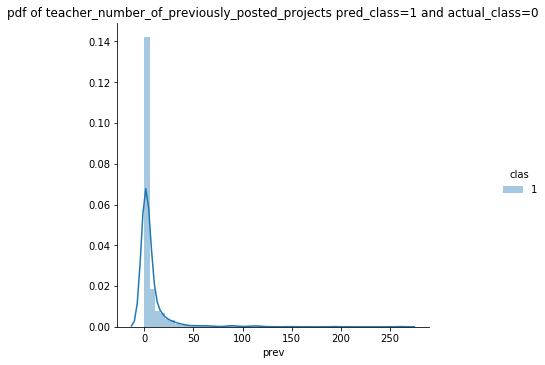

In [77]:
#pdf
sns.FacetGrid(cd, hue="clas", size=5) \
   .map(sns.distplot, "prev") \
   .add_legend();
plt.title("pdf of teacher_number_of_previously_posted_projects pred_class=1 and actual_class=0")
plt.show();

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [78]:
# Please write all the code with proper documentation
#collecting names of all features
L1=list(vectorizer_1.get_feature_names())
L2=list(vectorizer_2.get_feature_names())
L3=list(vectorizer_3.get_feature_names())
L4=list(vectorizer_4.get_feature_names())
L5=list(vectorizer_5.get_feature_names())
L6=list(vectorizer_8.get_feature_names())
L7=list(vectorizer_9.get_feature_names())

In [79]:
A=L1+L2+L3+L4+L5+L6+L7 

In [80]:
A.append("price")

A.append("prev_proposed_projects")

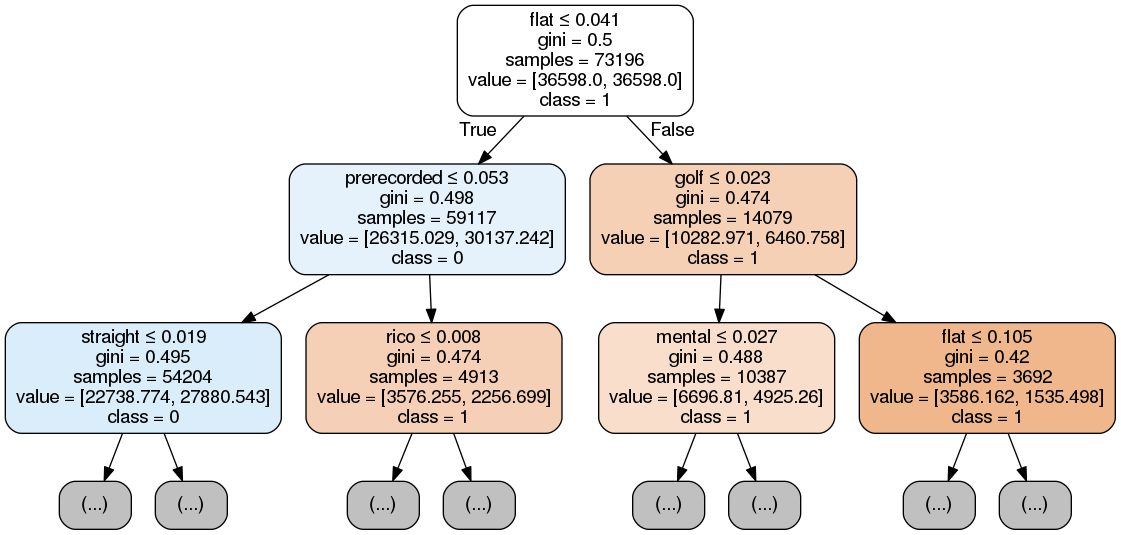

In [81]:
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen
import graphviz
from sklearn import tree
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

target = ['1','0']
# Create DOT data
data = tree.export_graphviz(dc,out_file=None,class_names=target,filled=True,rounded=True,special_characters=True,max_depth=2,feature_names=A)

# Draw graph
graph = pydotplus.graph_from_dot_data(data)  
#graph = Source(data)

# Show graph
Image(graph.create_png())
#display(SVG(graph.pipe(format='svg')))))

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [294]:
# Please write all the code with proper documentation

#merging
from scipy.sparse import hstack
X_tr = hstack((avg_w2v_vectors_traintitle, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,avg_w2v_vectors_trainessay,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((avg_w2v_vectors_cvtitle, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,avg_w2v_vectors_cvessay,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((avg_w2v_vectors_testtitle, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,avg_w2v_vectors_testessay,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)


Final Data matrix
train matrix=> (73196, 701) (73196,)
test matrix=> (36052, 701) (36052,)


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 40.3min finished


L1+++++++++++++++
0.6093645957883238
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
5
5


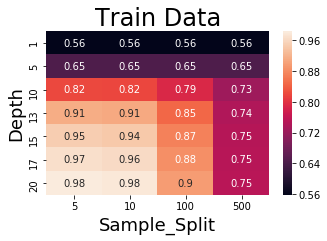

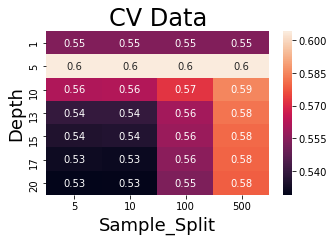

In [295]:
gd(X_tr,X_te)

- AUC avg word=0.6093645957883238
- max_depth=5
- min_sample_split=5

In [296]:
#test phase
# TEST PHASE FOR L1
dc=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dc.fit(X_tr,y_train)
pred = dc.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 66.684234%


In [297]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.22      0.46      0.29      5459
           1       0.88      0.70      0.78     30593

   micro avg       0.67      0.67      0.67     36052
   macro avg       0.55      0.58      0.54     36052
weighted avg       0.78      0.67      0.71     36052



In [298]:
pred_proba_te=dc.predict_proba(X_te)
pred_proba_te  = pred_proba_te[:, 1]

pred_proba_tr=dc.predict_proba(X_tr)
pred_proba_tr  = pred_proba_tr[:, 1]

In [299]:
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds

In [300]:
fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

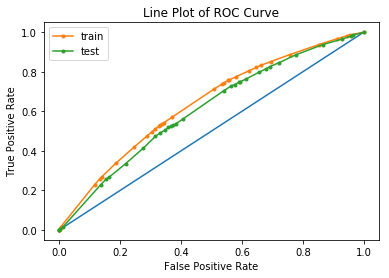

In [301]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [302]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

negatve  positive
negatve      2511      2948
positive     9063     21530

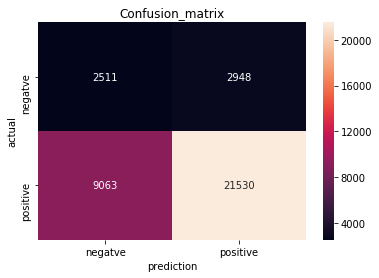

In [303]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2511
- FP=2948
- FN=9063
- TP=21530

In [308]:
# creating dataframe for y_test
y_Test=pd.DataFrame(y_test)

In [309]:
# add pred values in that dataframe
y_Test["pred"]=pred  

In [310]:
# selecting rows which are actually false 
g=y_Test[y_Test['project_is_approved']==0]

In [312]:
g.head()

project_is_approved  pred
55693                    0     0
84111                    0     1
82335                    0     0
74779                    0     1
27622                    0     0

In [313]:
 #now select rows which are correctly pred from all actual false
h=g[g['pred']==1]

In [314]:
k=h.index

In [315]:
index_fp=list(k)

In [316]:
t=""

for i in index_fp:
    '''concat all the features'''
    
    t=t+X.loc[i,"clean_essay"]

In [317]:
# how to plot word cloud 
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen.ipynb
#https://stackoverflow.com/questions/342687/algorithm-to-implement-a-word-cloud-like-wordle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

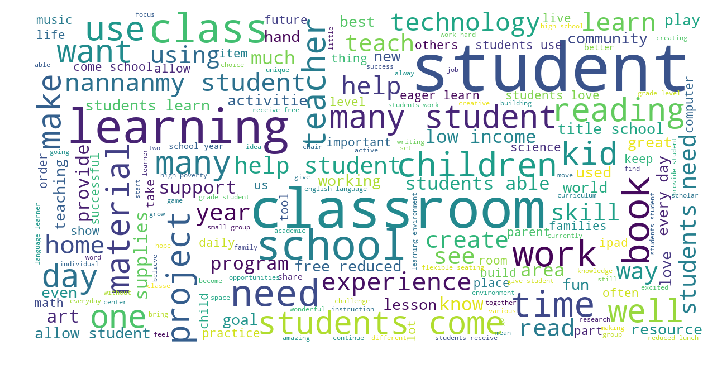

In [318]:
show_wordcloud(t)

In [319]:
price=[]
clas=[]
prev=[]
for i in index_fp:
    clas.append(y_Test.loc[i,'pred'])
    
    price.append(X.loc[i,"price"])
    prev.append(X.loc[i,"teacher_number_of_previously_posted_projects"])

In [320]:
cd=pd.DataFrame(columns=['price','prev','clas'])

In [321]:
cd['price']=price
cd['prev']=prev
cd['clas']=clas

No handles with labels found to put in legend.


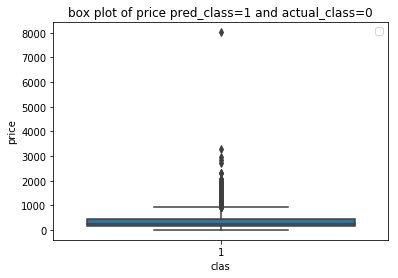

In [322]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
import seaborn as sns

sns.boxplot(x='clas',y='price', data=cd)

    
plt.title("box plot of price pred_class=1 and actual_class=0")
plt.legend()
plt.show()

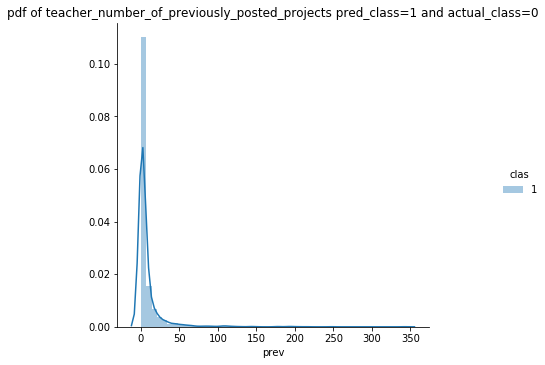

In [323]:
#pdf
sns.FacetGrid(cd, hue="clas", size=5) \
   .map(sns.distplot, "prev") \
   .add_legend();
plt.title("pdf of teacher_number_of_previously_posted_projects pred_class=1 and actual_class=0")
plt.show();

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [324]:
# Please write all the code with proper documentation
#merging
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_title_tr, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,tfidf_w2v_vectors_essay_tr,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((tfidf_w2v_vectors_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,tfidf_w2v_vectors_essay_cv,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((tfidf_w2v_vectors_title_te, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,tfidf_w2v_vectors_essay_te,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (73196, 701) (73196,)
test matrix=> (36052, 701) (36052,)


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 41.2min finished


L1+++++++++++++++
0.6210380634696877
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
5
500


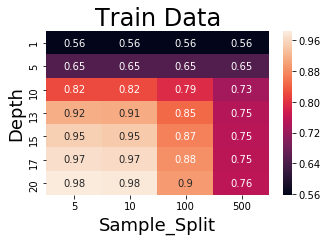

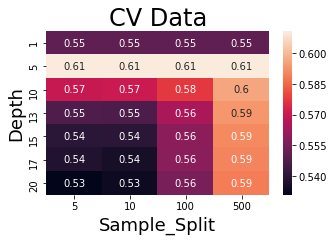

In [325]:
gd(X_tr,X_te)

- AUC TFIDF word=0.6210380634696877
- max_depth=5
- min_sample_split=500

In [326]:
#test phase
# TEST PHASE FOR L1
dc=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dc.fit(X_tr,y_train)
pred = dc.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 62.104738%


In [327]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.21      0.53      0.30      5459
           1       0.88      0.64      0.74     30593

   micro avg       0.62      0.62      0.62     36052
   macro avg       0.55      0.58      0.52     36052
weighted avg       0.78      0.62      0.67     36052



In [329]:
pred_proba_te=dc.predict_proba(X_te)
pred_proba_te  = pred_proba_te[:, 1]

pred_proba_tr=dc.predict_proba(X_tr)
pred_proba_tr  = pred_proba_tr[:, 1]

In [330]:
#AUC SCORE
auc_score_test_tfidf = roc_auc_score(y_test,pred_proba_te)
print(auc_score_test_tfidf)

0.6210380634696877


In [331]:
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds

In [332]:
fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

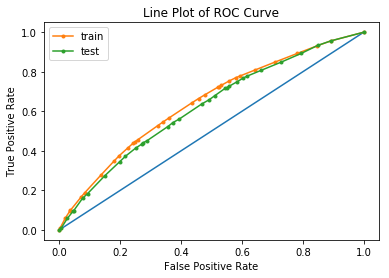

In [333]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [334]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

negatve  positive
negatve      2905      2554
positive    11108     19485

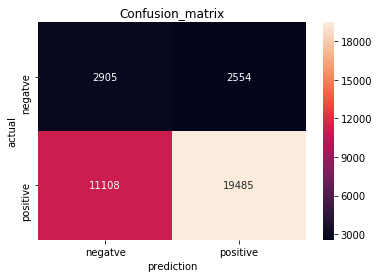

In [335]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2905
- FP=2554
- FN=11108
- TP=19485

In [336]:
# creating dataframe for y_test
y_Test=pd.DataFrame(y_test)

In [337]:
# add pred values in that dataframe
y_Test["pred"]=pred 

In [338]:
# selecting rows which are actually false 
g=y_Test[y_Test['project_is_approved']==0]

In [339]:
#now select rows which are correctly pred from all actual false
h=g[g['pred']==1]

In [340]:
k=h.index

In [341]:
index_fp=list(k)

In [342]:
t=""

for i in index_fp:
    '''concat all the features'''
    
    t=t+X.loc[i,"clean_essay"]

In [343]:
# how to plot word cloud 
#https://github.com/premvardhan/Amazon-fine-food-review-analysis/blob/master/DecisionTree_amazon_food_review_reopen.ipynb
#https://stackoverflow.com/questions/342687/algorithm-to-implement-a-word-cloud-like-wordle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

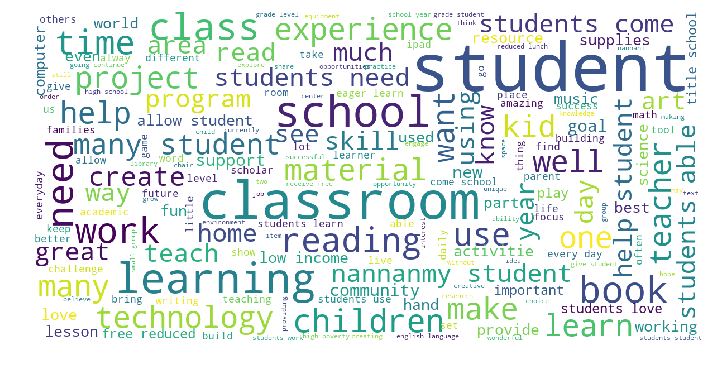

In [345]:
show_wordcloud(t)

In [346]:
price=[]
clas=[]
prev=[]
for i in index_fp:
    clas.append(y_Test.loc[i,'pred'])
    
    price.append(X.loc[i,"price"])
    prev.append(X.loc[i,"teacher_number_of_previously_posted_projects"])

In [347]:
cd=pd.DataFrame(columns=['price','prev','clas'])

In [348]:
cd['price']=price
cd['prev']=prev
cd['clas']=clas

No handles with labels found to put in legend.


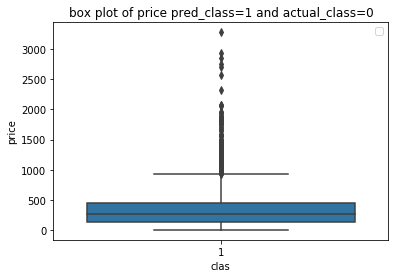

In [349]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
import seaborn as sns

sns.boxplot(x='clas',y='price', data=cd)

    
plt.title("box plot of price pred_class=1 and actual_class=0")
plt.legend()
plt.show()

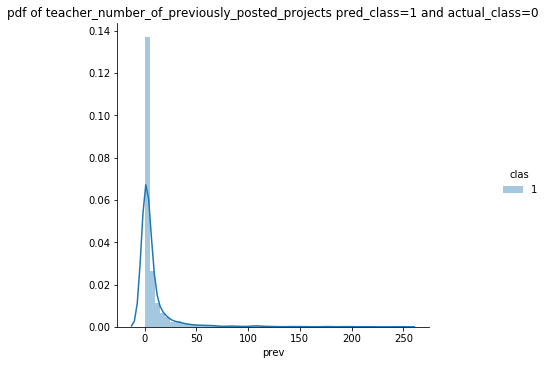

In [350]:
#pdf
sns.FacetGrid(cd, hue="clas", size=5) \
   .map(sns.distplot, "prev") \
   .add_legend();
plt.title("pdf of teacher_number_of_previously_posted_projects pred_class=1 and actual_class=0")
plt.show();

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [83]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# applying feature_importance     
parameter=dc.feature_importances_

In [110]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *

# Importing libraries



tuned_parameters = {'C': [5**-5,10**-4,5**-4 ,10**-3,5**-3, 10**-2,5**-2, 10**-1,5**-1,0.5,1,5,10**1,5**2,10**2,5**3,10**3,5**4,10**4]}

In [111]:
#Log of c
from math import log
R=[]
for i in tuned_parameters['C'] :
    R.append(log(i))


In [84]:
parameter.shape

(17046,)

In [85]:
# reverse sort the parameter on the basis of their value
rev_or=np.sort(parameter)[::-1]

In [86]:
#taking threshold of best 5000 features
threshold=best_feat=rev_or[:5000]
th=threshold[4999]# last one is our threshold value beyond this all are discarded

In [87]:
#5k best features and datapoints
# MACHINELEARNINGMASTERY.COM
from sklearn.feature_selection import SelectFromModel

selection=SelectFromModel(dc,threshold=th,prefit=True)
select_X_train=selection.transform(X_tr)
select_X_test=selection.transform(X_te)
## train model


# Please write all the code with proper documentation
# simple cv



In [93]:
from sklearn.preprocessing import StandardScaler
'''COLUMN STANDARDISED THE DATA MATRIX'''
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

scalar_1 = StandardScaler(with_mean=False)
scalar_1.fit(select_X_train) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
standardized_1 = scalar_1.transform(select_X_train)

standardized_2 = scalar_1.transform(select_X_test)


In [94]:
X_tr=standardized_1
X_te=standardized_2

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#def gd(X_tr,X_te):
from sklearn.model_selection import GridSearchCV    
def best(X_tr,X_te):
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
   
    '''function to predict best hyper parameter and plot cv auc and train auc with log(C)'''
    logistic=LogisticRegression(class_weight='balanced')

    clf = GridSearchCV(logistic, tuned_parameters, cv=3, scoring='roc_auc',n_jobs=-1)
    clf.fit(X_tr, y_train)

    train_auc= clf.cv_results_['mean_train_score']

    cv_auc = clf.cv_results_['mean_test_score'] 


    plt.plot(R, train_auc, label='Train AUC')


    plt.plot(R, cv_auc, label='CV AUC')


    plt.scatter(R, train_auc, label='Train AUC points')
    plt.scatter(R, cv_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("log(C)or log(1/LAMDA): hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC vs log(C) or log(1/LAMDA)")
    plt.grid()
    plt.show()

    # test AUC
    print(clf.score(X_te, y_test))
    print(clf.best_estimator_)# to know best parameters

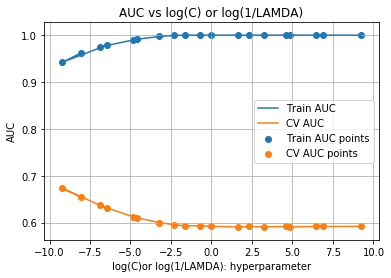

0.6841174116656429
LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [113]:
best(X_tr,X_te)

- AUC score=0.6841174116656429
- best C=0.0001

In [114]:
z=LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
z.fit(X_tr,y_train)
pred = z.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy is %f%%' % ( acc))


****Test accuracy is 71.213802%


In [115]:
pred_proba_te=z.predict_proba(X_te)
pred_proba_te  = pred_proba_te[:, 1]

In [116]:
# OTHER MEASURING PARAMETER
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.27      0.52      0.35      5459
           1       0.90      0.75      0.81     30593

   micro avg       0.71      0.71      0.71     36052
   macro avg       0.58      0.63      0.58     36052
weighted avg       0.80      0.71      0.75     36052



In [117]:
pred_proba_tr=z.predict_proba(X_tr)
pred_proba_tr  = pred_proba_tr[:, 1]

In [118]:
fpr, tpr, thresholds = roc_curve(y_test,pred_proba_te )
a=fpr
b=tpr
c=thresholds

In [119]:
fpr, tpr, thresholds = roc_curve(y_train,pred_proba_tr )

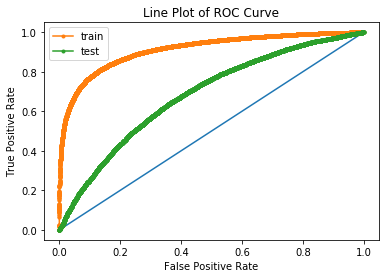

In [120]:
#TO PLOT ROC PLOT 
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [121]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
#confusion matrices
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

negatve  positive
negatve      2846      2613
positive     7765     22828

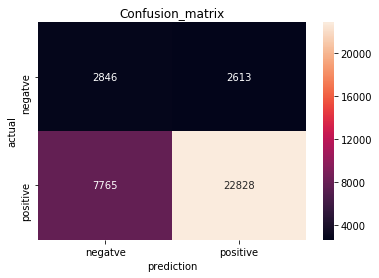

In [122]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2846
- FP=2613
- FN=7765
- TP=22828

<h1>3. Conclusion</h1>

In [125]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "depth","min_sample_split","AUC"]

In [127]:
x.add_row(['bow','decision_tree',10,500,0.6234644800046839])
x.add_row(['tfidf','decision_tree',13, 500,0.6318168510915642])
x.add_row(['average_word_','decision_tree',5,5,0.6093645957883238])
x.add_row(['tfidf_word_','decision_tree',5,500,0.6210380634696877])


In [128]:
print(x)

+---------------+---------------+-------+------------------+--------------------+
|   Vectorizer  |     Model     | depth | min_sample_split |        AUC         |
+---------------+---------------+-------+------------------+--------------------+
|      bow      | decision_tree |   10  |       500        | 0.6234644800046839 |
|     tfidf     | decision_tree |   13  |       500        | 0.6318168510915642 |
|      bow      | decision_tree |   10  |       500        | 0.6234644800046839 |
|     tfidf     | decision_tree |   13  |       500        | 0.6318168510915642 |
| average_word_ | decision_tree |   5   |        5         | 0.6093645957883238 |
|  tfidf_word_  | decision_tree |   5   |       500        | 0.6210380634696877 |
+---------------+---------------+-------+------------------+--------------------+


In [130]:
from prettytable import PrettyTable
x_1 = PrettyTable()
x_1.field_names = ["Vectorizer", "Model", "Hyperparameter C=1\lamda","AUC"]

In [131]:
x_1.add_row(['added Features Set 5','logistic_reg',0.0001,0.6841174116656429])

In [132]:
print(x_1)

+----------------------+--------------+--------------------------+--------------------+
|      Vectorizer      |    Model     | Hyperparameter C=1\lamda |        AUC         |
+----------------------+--------------+--------------------------+--------------------+
| added Features Set 5 | logistic_reg |          0.0001          | 0.6841174116656429 |
+----------------------+--------------+--------------------------+--------------------+
